<a href="https://colab.research.google.com/github/dcolinmorgan/test/blob/master/gpuMilipeed_bench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install s3fs

In [ ]:
# import torch
# mat = scipy.io.loadmat('file.mat')

In [1]:
import os,gc,glob
# import s3fs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from psutil import *
import scipy.io
from scipy.stats import zscore
import datetime
from sklearn import metrics
import traceback
import joblib

In [2]:
# !pip install cupy-cuda101==7.4.0
# import cupy as cp
## print(cp.__version__)
# !pip freeze | grep cupy

In [3]:
# !rm -rf netZooPy

In [ ]:
# !git clone https://github.com/netZoo/netZooPy.git
!git clone --single-branch --branch devel https://github.com/netZoo/netZooPy.git

# !git clone --single-branch --branch lioness_beta3 https://github.com/dcolinmorgan/netZooPy.git
# !git clone --single-branch --branch milipeed https://github.com/dcolinmorgan/netZooPy.git
os.chdir('netZooPy')
!pip install -e ./

In [63]:
# from importlib import reload  
# reload(netZooPy)

In [64]:
import netZooPy
from netZooPy.panda import Panda
from netZooPy.lioness import Lioness
# from netZooPy.milipeed import Milipeed ## just commented out to use reload above
os.chdir('..')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#gather A549 cell lines

In [ ]:
!pip install GEOparse

In [ ]:
# https://geoparse.readthedocs.io/en/latest/Analyse_hsa-miR-124a-3p_transfection_time-course.html#
import GEOparse
# gsem = GEOparse.get_GEO(geo="GSE92511", destdir="./")
# gsem = GEOparse.get_GEO(filepath="GSE92511_family.soft.gz")

##expression
gsee1 = GEOparse.get_GEO(geo="GSE48134", destdir="./") ##https://www.ncbi.nlm.nih.gov/sites/GDSbrowser?acc=GDS5067
gsee1 = GEOparse.get_GEO(filepath="GSE48134_family.soft.gz") ##15
gsee2 = GEOparse.get_GEO(geo="GSE53700", destdir="./") ##https://www.ncbi.nlm.nih.gov/sites/GDSbrowser?acc=GDS5206
gsee2 = GEOparse.get_GEO(filepath="GSE53700_family.soft.gz") ##18
gsee3 = GEOparse.get_GEO(geo="GSE56843", destdir="./") ##https://www.ncbi.nlm.nih.gov/sites/GDSbrowser?acc=GDS5418
gsee3 = GEOparse.get_GEO(filepath="GSE56843_family.soft.gz") ##8
gsee4 = GEOparse.get_GEO(geo="GSE17708", destdir="./") ##https://www.ncbi.nlm.nih.gov/sites/GDSbrowser?acc=GDS3710
gsee4 = GEOparse.get_GEO(filepath="GSE17708_family.soft.gz") ##26
gsee5 = GEOparse.get_GEO(geo="GSE5542", destdir="./") ##https://www.ncbi.nlm.nih.gov/sites/GDSbrowser?acc=GDS2341
gsee5 = GEOparse.get_GEO(filepath="GSE5542_family.soft.gz")

In [ ]:
expression1 = gsee1.pivot_samples('VALUE')
expression2 = gsee2.pivot_samples('VALUE')
expression3 = gsee3.pivot_samples('VALUE')
expression4 = gsee4.pivot_samples('VALUE')
expression5 = gsee5.pivot_samples('VALUE')


In [ ]:
names=pd.DataFrame([gsee1.gpls['GPL6244'].table['ID'],gsee1.gpls['GPL6244'].table['gene_assignment'].str.split('//').str[1]]).transpose()
data1=pd.merge(expression1,names,left_index=True,right_on='ID')
data1=data1.dropna(how='any')
data1.index=data1['gene_assignment']
del data1['ID'], data1['gene_assignment']

data1.to_csv('drive/My Drive/Colab Notebooks/GSE48134.txt',sep='\t')

In [ ]:
names=pd.DataFrame([gsee2.gpls['GPL6480'].table['ID'],gsee2.gpls['GPL6480'].table['GENE_SYMBOL']]).transpose()
data2=pd.merge(expression2,names,left_index=True,right_on='ID')
data2=data2.dropna(how='any')
data2.index=data2['GENE_SYMBOL']
del data2['ID'], data2['GENE_SYMBOL']

data2.to_csv('drive/My Drive/Colab Notebooks/GSE53700.txt',sep='\t')

In [ ]:
names=pd.DataFrame([gsee3.gpls['GPL570'].table['ID'],gsee3.gpls['GPL570'].table['Gene Symbol'].str.split('//').str[0]]).transpose()
data3=pd.merge(expression3,names,left_index=True,right_on='ID')
data3=data3.dropna(how='any')
data3.index=data3['Gene Symbol']
del data3['ID'], data3['Gene Symbol']

data3.to_csv('drive/My Drive/Colab Notebooks/GSE56843.txt',sep='\t')

In [ ]:
names=pd.DataFrame([gsee4.gpls['GPL570'].table['ID'],gsee4.gpls['GPL570'].table['Gene Symbol'].str.split('//').str[0]]).transpose()
data4=pd.merge(expression4,names,left_index=True,right_on='ID')
data4=data4.dropna(how='any')
data4.index=data4['Gene Symbol']
del data4['ID'], data4['Gene Symbol']

data4.to_csv('drive/My Drive/Colab Notebooks/GSE17708.txt',sep='\t')

In [ ]:
names=pd.DataFrame([gsee5.gpls['GPL96'].table['ID'],gsee5.gpls['GPL96'].table['Gene Symbol'].str.split('//').str[0]]).transpose()
data5=pd.merge(expression5,names,left_index=True,right_on='ID')
data5=data5.dropna(how='any')
data5.index=data5['Gene Symbol']
del data5['ID'], data5['Gene Symbol']

data5.to_csv('drive/My Drive/Colab Notebooks/GSE17708.txt',sep='\t')

In [ ]:
dfs = [data3,data4,data5]

data=pd.concat(dfs, axis=0)#.reset_index()
# data.dropna(how='any')
# data
# df0.groupby(df0['cat']).agg('mean')
dataa=data.groupby(data.index).agg('mean')
dataa=dataa.dropna(how='any')
# dataa

dataa.to_csv('drive/My Drive/Colab Notebooks/GSE56843_GSE17708GSE5542.txt',sep='\t')
# GSE56843_GSE17708GSE5542

In [ ]:
# dataa.columns=['A549','A549','A549','A549','A549','A549','A549','A549','A549','A549','A549',
#                'A549','A549','A549','A549','A549','A549','A549','A549','A549','A549','A549','A549',
#                'A549','A549','A549','A549','A549','A549','A549','A549','A549','A549','A549','A549',
#                'A549','A549','A549','A549','A549','A549','A549','A549','A549','A549',
#                'A549','A549','A549','A549','A549','A549','A549','A549','A549','A549','A549',
#                'A549','A549','A549','A549','A549','A549','A549','A549','A549','A549']
dataa.rename(columns={'GSM1370129':'A549'}, inplace=True)

dataa.to_csv('drive/My Drive/Colab Notebooks/A549_expression.txt',sep='\t')
dataa.to_csv('drive/My Drive/Colab Notebooks/A549_expression_panda.txt',sep='\t',header=None,index=None)


In [ ]:
LCL_ppi=pd.read_csv('https://granddb.s3.amazonaws.com/gpuPANDA/ppi2015_freezeCellLine.txt',sep='\t',header=None)
LCL_ppi.to_csv('drive/My Drive/Colab Notebooks/ppi_complete.txt',sep='\t',index=False)
# # expression.to_csv('GPL10558.txt',sep='\t',index=True,header=True)
# # methylation.to_csv('GSE76925.txt',sep='\t',index=True,header=True)
# # # LCL_motif=pd.read_csv('https://granddb.s3.amazonaws.com/gpuPANDA/Hugo_motifCellLine_reduced.txt',sep='\t',header=None)
# # # LCL_motif.to_csv('Hugo_motifCellLine_reduced.txt',sep='\t',index=False)
coding_LCL_motif=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/motifs/Hugo_motifCellLine.txt',sep='\t',header=None)
coding_LCL_motif[coding_LCL_motif[2]!=0].to_csv('drive/My Drive/Colab Notebooks/one_coding_LCL_motif.txt',sep='\t',index=False,header=False)
# milipeed_test_motif=pd.read_csv('drive/My Drive/Colab Notebooks dcm/milipeed_test_tr.txt',sep='\t',header=0,index_col=0)
# milipeed_test_motif.columns = milipeed_test_motif.columns.str.replace("-", ".")
# milipeed_test_motif.to_csv('milipeed_test_motif.txt',sep='\t',index=True,header=True)


In [ ]:
gen_motif=pd.read_csv('https://granddb.s3.amazonaws.com/gpuPANDA/Hugo_motifCellLine_reduced.txt',sep='\t',header=None)
gen_motif[gen_motif[2]!=0].to_csv('drive/My Drive/Colab Notebooks/gen_motif.txt',sep='\t',index=False)
# LCL_ppi=pd.read_csv('https://granddb.s3.amazonaws.com/gpuPANDA/ppi2015_freezeCellLine.txt',sep='\t',header=None)
# LCL_ppi.to_csv('ppi_complete.txt',sep='\t',index=False)
# milipeed_test_motif=pd.read_csv('drive/My Drive/Colab Notebooks/milipeed_test_tr.txt',sep='\t',header=0,index_col=0)
# milipeed_test_motif.columns = milipeed_test_motif.columns.str.replace("-", ".")
# milipeed_test_motif.to_csv('milipeed_test_motif.txt',sep='\t',index=True,header=True)


In [ ]:
[coding_LCL_motif[coding_LCL_motif[2]!=0].shape,gen_motif[gen_motif[2]!=0].shape]

In [ ]:
A549_motif=pd.read_csv('drive/My Drive/Colab Notebooks/A-549b.txt',sep='\t',header=None)
A549_motif.columns=['cg','A549']
A549_motif.index=A549_motif['cg']
del A549_motif['cg']
A549_motif.to_csv('drive/My Drive/Colab Notebooks/A-549c.txt',sep='\t')

In [ ]:
# tmp_expdata = expression#pd.read_csv(expression_file,sep='\t',header=0,nrows=0)
# tmp_betadata = milipeed_test_motif#pd.read_csv(methylation_file,sep='\t',header=0,nrows=0)
# b_subj=tmp_betadata.columns[(tmp_betadata.columns).isin(tmp_expdata)].dropna().tolist()
# e_subj=tmp_expdata.columns[(tmp_expdata.columns).isin(tmp_betadata)].dropna().tolist()
# # tmp_betadata2[pd.DataFrame(tmp_betadata2).isin(tmp_expdata2),]
# print('Number of subjects:', len(b_subj))



In [ ]:

time=datetime.datetime.utcnow()#.str.split(' ')[0]
date=str(time).split(' ')[0]

In [ ]:
panda_obj=netZooPy.panda.Panda(expression_file='drive/My Drive/Colab Notebooks/A549_expression_panda.txt', ###matrixes need no patient info
                      # methylation_file='drive/My Drive/Colab Notebooks/A-549c.txt',
                      motif_file='drive/My Drive/Colab Notebooks/gen_motif.txt', ###motif need no patient info
                      ppi_file='drive/My Drive/Colab Notebooks/ppi_complete.txt',
    computing='gpu',save_memory=True,save_tmp=False,remove_missing=False,
    keep_expression_matrix=False,modeProcess='intersection')

panda_obj.save_panda_results('A549panda_full_'+date+'.txt')



## run mili partial

In [ ]:
milipeed_objA=netZooPy.milipeed.Milipeed(expression_file='drive/My Drive/Colab Notebooks/A549_expression.txt',
                      methylation_file='drive/My Drive/Colab Notebooks/A-549c.txt',
                      # motif_file='drive/My Drive/Colab Notebooks/one_coding_LCL_motif.txt',
                      ppi_file='drive/My Drive/Colab Notebooks/ppi_complete.txt',
    computing='gpu',save_dir='milipeed_output/',start=0,end='agg',
    save_fmt='npy',map_file='netZooPy/tests/milipeed/MotifPrior_CGmap.txt')

milipeed_objA.save_milipeed_results(file='A549mili_partial_'+date+'.txt')



##run mili full

In [ ]:
milipeed_objB=netZooPy.milipeed.Milipeed(expression_file='drive/My Drive/Colab Notebooks/A549_expression.txt',
                      methylation_file='drive/My Drive/Colab Notebooks/A-549c.txt',
                      motif_file='drive/My Drive/Colab Notebooks/one_coding_LCL_motif.txt',
                      ppi_file='drive/My Drive/Colab Notebooks/ppi_complete.txt',
    computing='gpu',save_dir='milipeed_output/',start=0,end='agg',
    save_fmt='npy',map_file='netZooPy/tests/milipeed/MotifPrior_CGmap.txt')

milipeed_objB.save_milipeed_results(file='A549mili_full_'+date+'.txt')



Finding common subjects ...
  Elapsed time: 0.02 sec.
Number of subjects: 1
Loading PPI data ...
Number PPIs: 85315
  Elapsed time: 0.14 sec.
Loading expression data ...
Expression matrix: (13435, 1)
  Elapsed time: 0.15 sec.
Creating motif ...
  Elapsed time: 20.44 sec.


AttributeError: ignored

#load to compare vs spaso A549 0-1kb, 5-10, 20-25 ChIP

In [ ]:
# from udd/spaso/
uTF=['ATF3','BHLHE40','CEBPB','CREB1','CTCF','ELF1','EP300','ETS1','FOSL2','FOXA1','GABPA','MAX','NR3C1','REST','SIX5','TCF12','USF1','YY1','ZBTB33']
uGene=pd.read_csv('drive/My Drive/Colab Notebooks/here.txt',sep='\t',header=None)

A549_GS=pd.read_csv('drive/My Drive/Colab Notebooks/adj_chip_abhi_A549_0-5kb.txt',sep='\t',header=None)
A549_GS=A549_GS.T
A549_GS.shape
A549_GS.columns=pd.DataFrame(uTF)[0]
A549_GS.shape
A549_GS.index=uGene[0]
A549_GS
A549_GS.to_csv('drive/My Drive/Colab Notebooks/GS_adj_chip_abhi_A549_0-5kb.txt',sep='\t')

A549_GS=pd.read_csv('drive/My Drive/Colab Notebooks/adj_chip_abhi_A549_5-10kb.txt',sep='\t',header=None)
A549_GS=A549_GS.T
A549_GS.shape
A549_GS.columns=pd.DataFrame(uTF)[0]
A549_GS.shape
A549_GS.index=uGene[0]
A549_GS
A549_GS.to_csv('drive/My Drive/Colab Notebooks/GS_adj_chip_abhi_A549_5-10kb.txt',sep='\t')

A549_GS=pd.read_csv('drive/My Drive/Colab Notebooks/adj_chip_abhi_A549_20-25kb.txt',sep='\t',header=None)
A549_GS=A549_GS.T
A549_GS.shape
A549_GS.columns=pd.DataFrame(uTF)[0]
A549_GS.shape
A549_GS.index=uGene[0]
A549_GS
A549_GS.to_csv('drive/My Drive/Colab Notebooks/GS_adj_chip_abhi_A549_20-25kb.txt',sep='\t')

##format each GS

In [ ]:
A549_GS=pd.read_csv('drive/My Drive/Colab Notebooks/GS_adj_chip_abhi_A549_0-1kb.txt',sep='\t',header=0,index_col=0)
A549_GS['index']=A549_GS.index
df2 = pd.melt(A549_GS.reset_index(), id_vars='index')#,value_vars=A549_GS.columns)
df2=df2[df2['value'].astype(str).str.isdigit()]
df2.columns=['gene','TF','weight']
A549_GS=pd.read_csv('drive/My Drive/Colab Notebooks/GS_adj_chip_abhi_A549_5-10kb.txt',sep='\t',header=0,index_col=0)
A549_GS['index']=A549_GS.index
df3 = pd.melt(A549_GS.reset_index(), id_vars='index')#,value_vars=A549_GS.columns)
df3=df3[df3['value'].astype(str).str.isdigit()]
df3.columns=['gene','TF','weight']
# df3
A549_GS=pd.read_csv('drive/My Drive/Colab Notebooks/GS_adj_chip_abhi_A549_20-25kb.txt',sep='\t',header=0,index_col=0)
A549_GS['index']=A549_GS.index
df4 = pd.melt(A549_GS.reset_index(), id_vars='index')#,value_vars=A549_GS.columns)
df4=df4[df4['value'].astype(str).str.isdigit()]
df4.columns=['gene','TF','weight']
# df3

##load milipeed nets again

In [ ]:
A549_methyl_links=pd.read_csv('drive/My Drive/Colab Notebooks/A549_mili_bench_101420/link_names.txt',sep='\t',header=None)
A549_methyl=pd.read_csv('drive/My Drive/Colab Notebooks/A549_mili_bench_101420/A549mili_full_2020-10-14.txt',sep='\t',header=None)
A549_methyl.index=pd.DataFrame(A549_methyl_links)[0]
A549_methyl['TF']=A549_methyl.index.str.split('_').str[0].tolist()
A549_methyl['gene']=A549_methyl.index.str.split('_').str[1].tolist()

A549_methyl=A549_methyl[['TF','gene',0]]
A549_methyl.columns=['TF','gene','weight']
# A549_methyl=A549_methyl.reset_index()
# del A549_methyl[0]
A549_methyl

# compute AUROC and AUPR compared to GS

In [ ]:
A549_methyl_links=pd.read_csv('drive/My Drive/Colab Notebooks/A549_mili_bench_101420/link_names.txt',sep='\t',header=None)
A549_methyl=pd.read_csv('drive/My Drive/Colab Notebooks/A549_mili_bench_101420/A549mili_full_2020-10-14.txt',sep='\t',header=None)
A549_methyl.index=pd.DataFrame(A549_methyl_links)[0]
A549_methyl['TF']=A549_methyl.index.str.split('_').str[0].tolist()
A549_methyl['gene']=A549_methyl.index.str.split('_').str[1].tolist()

A549_methyl=A549_methyl[['TF','gene',0]]
A549_methyl.columns=['TF','gene','weight']
# A549_methyl=A549_methyl.reset_index()
del A549_methyl[0]
A549_methyl

In [ ]:
from functools import reduce
data_frames = [A549_methyl, df2, df3,df4]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['TF','gene'],
                                            how='inner'), data_frames)
df_merged.columns=['TF','gene','mili_weight','GS 0-1kb','GS 5-10kb','GS 20-25kb']

In [ ]:
df_merged['mili_weight']=pd.to_numeric(df_merged['mili_weight'])
df_merged['GS 0-1kb']=pd.to_numeric(df_merged['GS 0-1kb'])
df_merged['GS 5-10kb']=pd.to_numeric(df_merged['GS 5-10kb'])
df_merged['GS 20-25kb']=pd.to_numeric(df_merged['GS 20-25kb'])

# df_merged.weight_y=(compare.weight_y-compare.weight_y.min())/(compare.weight_y.max()-compare.weight_y.min())

plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, thresholds = metrics.roc_curve(df_merged['GS 0-1kb'], df_merged.mili_weight)
roc_auc=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='0-1kb GS (area = {0:0.2f})'''.format(roc_auc),color='k', linestyle=':', linewidth=4)

# plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, thresholds = metrics.roc_curve(df_merged['GS 5-10kb'], df_merged.mili_weight)
roc_auc=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='5-10kb GS (area = {0:0.2f})'''.format(roc_auc),color='r', linestyle=':', linewidth=4)

# plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, thresholds = metrics.roc_curve(df_merged['GS 20-25kb'], df_merged.mili_weight)
roc_auc=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='20-25kb GS (area = {0:0.2f})'''.format(roc_auc),color='b', linestyle=':', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC')
plt.legend(loc="best")

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
precision, recall, thresholds = metrics.precision_recall_curve(df_merged['GS 0-1kb'], df_merged.mili_weight)
roc_auc3=metrics.average_precision_score(df_merged['GS 0-1kb'], df_merged.mili_weight)
plt.plot(recall,precision, label='0-1kb GS (avg Prec = {0:0.2f})'''.format(roc_auc3),color='k', linestyle=':', linewidth=4)

precision, recall, thresholds = metrics.precision_recall_curve(df_merged['GS 5-10kb'], df_merged.mili_weight)
roc_auc3=metrics.average_precision_score(df_merged['GS 5-10kb'], df_merged.mili_weight)
plt.plot(recall,precision, label='5-10kb GS (avg Prec = {0:0.2f})'''.format(roc_auc3),color='r', linestyle=':', linewidth=4)

precision, recall, thresholds = metrics.precision_recall_curve(df_merged['GS 20-25kb'], df_merged.mili_weight)
roc_auc3=metrics.average_precision_score(df_merged['GS 20-25kb'], df_merged.mili_weight)
plt.plot(recall,precision, label='20-25kb GS (avg Prec = {0:0.2f})'''.format(roc_auc3),color='b', linestyle=':', linewidth=4)

plt.xlabel('Recall or TPR')
plt.ylabel('Precision')
plt.title('AUPR')
plt.legend(loc="best")

## compute AUROC and AUPR **adding 0s where no chip** in GS

In [ ]:
from functools import reduce
data_frames = [A549_methyl, df2, df3,df4]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['TF','gene'],
                                            how='outer'), data_frames)

In [ ]:
df_merged.columns=['TF','gene','mili_weight','GS 0-1kb','GS 5-10kb','GS 20-25kb']
df_merged=df_merged.fillna(0)


In [ ]:
df_merged['mili_weight']=pd.to_numeric(df_merged['mili_weight'])
df_merged['GS 0-1kb']=pd.to_numeric(df_merged['GS 0-1kb'])
df_merged['GS 5-10kb']=pd.to_numeric(df_merged['GS 5-10kb'])
df_merged['GS 20-25kb']=pd.to_numeric(df_merged['GS 20-25kb'])

# df_merged.weight_y=(compare.weight_y-compare.weight_y.min())/(compare.weight_y.max()-compare.weight_y.min())

plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, thresholds = metrics.roc_curve(df_merged['GS 0-1kb'], df_merged.mili_weight)
roc_auc=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='0-1kb GS (area = {0:0.2f})'''.format(roc_auc),color='k', linestyle=':', linewidth=4)

# plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, thresholds = metrics.roc_curve(df_merged['GS 5-10kb'], df_merged.mili_weight)
roc_auc=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='5-10kb GS (area = {0:0.2f})'''.format(roc_auc),color='r', linestyle=':', linewidth=4)

# plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, thresholds = metrics.roc_curve(df_merged['GS 20-25kb'], df_merged.mili_weight)
roc_auc=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='20-25kb GS (area = {0:0.2f})'''.format(roc_auc),color='b', linestyle=':', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC')
plt.legend(loc="best")

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
precision, recall, thresholds = metrics.precision_recall_curve(df_merged['GS 0-1kb'], df_merged.mili_weight)
roc_auc3=metrics.average_precision_score(df_merged['GS 0-1kb'], df_merged.mili_weight)
plt.plot(recall,precision, label='0-1kb GS (avg Prec = {0:0.2f})'''.format(roc_auc3),color='k', linestyle=':', linewidth=4)

precision, recall, thresholds = metrics.precision_recall_curve(df_merged['GS 5-10kb'], df_merged.mili_weight)
roc_auc3=metrics.average_precision_score(df_merged['GS 5-10kb'], df_merged.mili_weight)
plt.plot(recall,precision, label='5-10kb GS (avg Prec = {0:0.2f})'''.format(roc_auc3),color='r', linestyle=':', linewidth=4)

precision, recall, thresholds = metrics.precision_recall_curve(df_merged['GS 20-25kb'], df_merged.mili_weight)
roc_auc3=metrics.average_precision_score(df_merged['GS 20-25kb'], df_merged.mili_weight)
plt.plot(recall,precision, label='20-25kb GS (avg Prec = {0:0.2f})'''.format(roc_auc3),color='b', linestyle=':', linewidth=4)

plt.xlabel('Recall or TPR')
plt.ylabel('Precision')
plt.title('AUPR')
plt.legend(loc="best")

# gather GM12878-ish EXP run Panda & Milipeed


In [ ]:
LCL_exp=pd.read_csv('drive/My Drive/Colab Notebooks/abhi_LCL_sub.txt',sep='\t',header=0)
# # LCL_exp=pd.read_csv('drive/My Drive/Colab Notebooks/LCL.txt',sep='\t',header=None)
LCL_names=pd.read_csv('drive/My Drive/Colab Notebooks/abhi_LCL_names.txt',sep='\t',header=0)

LCL_exp.index=LCL_names['x']
LCL_exp.rename(columns={'GTEX-11EM3-0001-SM-5Q5BD':'GM12878'}, inplace=True)

LCL_exp.to_csv('drive/My Drive/Colab Notebooks/LCL_exp.txt',sep='\t')
LCL_exp.to_csv('drive/My Drive/Colab Notebooks/LCL_exp_panda.txt',sep='\t',header=None)


In [ ]:
LCL_exp

In [ ]:
# gen_motif=pd.read_csv('https://granddb.s3.amazonaws.com/gpuPANDA/Hugo_motifCellLine_reduced.txt',sep='\t',header=None)
# gen_motif[gen_motif[2]!=0].to_csv('drive/My Drive/Colab Notebooks/gen_motif.txt',sep='\t',index=False)

# gen_motif2=pd.read_csv('https://granddb.s3.amazonaws.com/gpuPANDA/motif_complete_reduced.txt',sep='\t',header=None)
# gen_motif2[gen_motif2[2]!=0].to_csv('drive/My Drive/Colab Notebooks/gen_motif_complete.txt',sep='\t',index=False)

# coding_LCL_motif=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/motifs/Hugo_motifCellLine.txt',sep='\t',header=None)
# coding_LCL_motif[coding_LCL_motif[2]!=0].to_csv('drive/My Drive/Colab Notebooks/one_coding_LCL_motif.txt',sep='\t',index=False,header=False)

# LCL_ppi=pd.read_csv('https://granddb.s3.amazonaws.com/gpuPANDA/ppi2015_freezeCellLine.txt',sep='\t',header=None)
# LCL_ppi.to_csv('drive/My Drive/Colab Notebooks/ppi_complete.txt',sep='\t',index=False)

time=datetime.datetime.utcnow()#.str.split(' ')[0]
date=str(time).split(' ')[0]

In [ ]:
D1=pd.read_csv('drive/My Drive/Colab Notebooks/one_coding_LCL_motif.txt',sep='\t')
D2=pd.read_csv('drive/My Drive/Colab Notebooks/gen_motif.txt',sep='\t')
D3=pd.read_csv('drive/My Drive/Colab Notebooks/gen_motif_complete.txt',sep='\t')
[D1.shape,D2.shape,D3.shape]

[(1592028, 3), (39702, 3), (1553604, 3)]

In [ ]:
c=np.random.choice(1592028, 50000,replace=False)
D1.loc[c.tolist()].to_csv('drive/My Drive/Colab Notebooks/rand50k_motif.txt',sep='\t',index=False)
# D1=pd.read_csv('drive/My Drive/Colab Notebooks/gen_motif.txt',sep='\t',header=None)
# D1.shape

In [ ]:
panda_obj.save_panda_results

In [ ]:
panda_obj=netZooPy.panda.Panda(expression_file='drive/My Drive/Colab Notebooks/LCL_exp_panda.txt', ###matrixes need no patient info
                      # methylation_file='drive/My Drive/Colab Notebooks/A-549c.txt',
                      motif_file='drive/My Drive/Colab Notebooks/rand50k_motif.txt', ###motif need no patient info
                        # motif_file='drive/My Drive/Colab Notebooks/gen_motif.txt', ###motif need no patient info
                      ppi_file='drive/My Drive/Colab Notebooks/ppi_complete.txt',
    computing='gpu',save_memory=True,save_tmp=False,remove_missing=True,
    keep_expression_matrix=False,modeProcess='intersection',precision='single')

# panda_obj.save_panda_results('drive/My Drive/Colab Notebooks/LCL_panda_'+date+'.txt')

cc=pd.DataFrame(panda_obj.panda_network)
cc.columns=panda_obj.motif_genes
cc.index=panda_obj.motif_tfs
jj=pd.DataFrame(cc.stack())
jj=jj.reset_index()
jj.to_csv('drive/My Drive/Colab Notebooks/LCL_panda_50k_'+date+'.txt',sep='\t',header=False,index=False)

In [ ]:
panda_obj.motif_genes

In [ ]:
# !wget https://www.encodeproject.org/files/ENCFF279HCL/@@download/ENCFF279HCL.bed.gz ~
# !gunzip ENCFF279HCL.bed.gz
# annotate WGBS to gene via UCSC table browser
# https://genome.ucsc.edu/cgi-bin/hgTables?hgsid=999044375_7MajAhXRV8D72iA8zwEVAEDXuTTR&boolshad.hgta_printCustomTrackHeaders=0&hgta_ctName=tb_knownGene&hgta_ctDesc=table+browser+query+on+knownGene&hgta_ctVis=pack&hgta_ctUrl=&fbQual=whole&fbUpBases=200&fbExonBases=0&fbIntronBases=0&fbDownBases=200&hgta_doGetBed=get+BED
# https://genome.ucsc.edu/cgi-bin/hgTables
loc=pd.read_csv('drive/My Drive/Colab Notebooks/ensmbl.txt',sep='\t',header=None,names=['chr','start','end','enst'])
loc_gene=pd.read_csv('drive/My Drive/Colab Notebooks/enst_to_gene.txt',sep='\t',header=None,names=['enst','gene'])

print(len(loc),len(loc_gene))

247541 117494


In [ ]:
pd.merge(loc,loc_gene)

,chr,start,end,enst,gene
0,chr1,65418,71585,ENST00000641515.2,OR4F5
1,chr1,69054,70108,ENST00000335137.4,OR4F5
2,chr1,685678,686673,ENST00000332831.4,OR4F16
3,chr1,817370,819837,ENST00000326734.2,Family_with_sequence_similarity_87_member_B
4,chr1,923927,939291,ENST00000420190.6,Sterile_alpha_motif_domain_containing_11
...,...,...,...,...,...
117599,chr22_KQ759761v1_alt,4239,7650,ENST00000636910.1,CYP2D6
117600,chr22_KQ759761v1_alt,4239,8551,ENST00000646114.2,CYP2D6
117601,chr22_KQ759761v1_alt,4241,8622,ENST00000636361.1,CYP2D6
117602,chr22_KQ759761v1_alt,4275,8554,ENST00000635910.1,CYP2D6


In [ ]:
GM12878_motif=pd.read_csv('drive/My Drive/Colab Notebooks/GM12878b.txt',sep='\t',header=None)
GM12878_motif.columns=['cg','GM12878']
GM12878_motif.index=GM12878_motif['cg']
del GM12878_motif['cg']
GM12878_motif.to_csv('drive/My Drive/Colab Notebooks/GM12878c.txt',sep='\t')

In [ ]:
# GM12878_motif
map_file=pd.read_csv('netZooPy/tests/milipeed/MotifPrior_CGmap.txt',sep='\t')
map_file

,ID1,ABCA12,cg26534460
0,ID1,ABHD2,cg25523753
1,ID1,ACO2,cg05593780
2,ID1,ACOT7,cg17236617
3,ID1,ACOXL,cg10768548
4,ID1,ADGRE5,cg14212190
...,...,...,...
667728,ZNF589,ZNF436-AS1,cg00269115
667729,ZNF589,ZNF573,cg08173348
667730,ZNF589,ZNF610,cg07703337
667731,ZNF589,ZNF610,cg15062535


In [ ]:
milipeed_objA=netZooPy.milipeed.Milipeed(expression_file='drive/My Drive/Colab Notebooks/LCL_exp.txt',
                      methylation_file='drive/My Drive/Colab Notebooks/GM12878c.txt',
                      # motif_file='drive/My Drive/Colab Notebooks/one_coding_LCL_motif.txt',
                      ppi_file='drive/My Drive/Colab Notebooks/ppi_complete.txt',
    computing='gpu',save_dir='drive/My Drive/Colab Notebooks/LCL_mili_partial/',start=0,end='agg',
    save_fmt='npy',map_file='netZooPy/tests/milipeed/MotifPrior_CGmap.txt')

milipeed_objA.save_milipeed_results(file='LCL_mili_full/LCL_mili_partial_'+date+'.txt')



In [ ]:
plt.hist(milipeed_objA.motif_data[2])
len(milipeed_objA.motif_data)

In [ ]:
milipeed_objB=netZooPy.milipeed.Milipeed(expression_file='drive/My Drive/Colab Notebooks/LCL_exp.txt',
                      methylation_file='drive/My Drive/Colab Notebooks/GM12878c.txt',
                      motif_file='drive/My Drive/Colab Notebooks/rand10k_motif.txt',
                      ppi_file='drive/My Drive/Colab Notebooks/ppi_complete.txt',
    computing='gpu',save_dir='drive/My Drive/Colab Notebooks/LCL_mili_10krand/',start=0,end='agg',
    save_fmt='npy',map_file='netZooPy/tests/milipeed/MotifPrior_CGmap.txt')

milipeed_objB.save_milipeed_results(file='drive/My Drive/Colab Notebooks/LCL_mili_10krand/LCL_mili_full_'+date+'.txt')

In [ ]:
plt.hist(milipeed_objB.motif_data[2])
len(milipeed_objB.motif_data)

# compare and calc AUC

In [ ]:
GM0 = scipy.io.loadmat('drive/My Drive/Colab Notebooks/GSNET_0-1kb_GM12878.mat')
df=pd.DataFrame(GM0['uGene'])[0]
genes = [i[0] for i in df]
df=pd.DataFrame(GM0['uTF'])[0]
TF = [i[0] for i in df]
GM0_GS=pd.DataFrame(GM0['adj_chip'])
GM0_GS.index=TF
GM0_GS.columns=genes
GM0_GS=GM0_GS.T
GM0_GS.to_csv('drive/My Drive/Colab Notebooks/GSNET_0-1kb_GM12878.txt',sep='\t')


GM1 = scipy.io.loadmat('drive/My Drive/Colab Notebooks/GSNET_5-10kb_GM12878.mat')
df=pd.DataFrame(GM1['uGene'])[0]
genes = [i[0] for i in df]
df=pd.DataFrame(GM1['uTF'])[0]
TF = [i[0] for i in df]
GM1_GS=pd.DataFrame(GM1['adj_chip'])
GM1_GS.index=TF
GM1_GS.columns=genes
GM1_GS=GM1_GS.T
GM1_GS.to_csv('drive/My Drive/Colab Notebooks/GSNET_5-10kb_GM12878.txt',sep='\t')


GM2 = scipy.io.loadmat('drive/My Drive/Colab Notebooks/GSNET_20-25kb_GM12878.mat')
df=pd.DataFrame(GM2['uGene'])[0]
genes = [i[0] for i in df]
df=pd.DataFrame(GM2['uTF'])[0]
TF = [i[0] for i in df]
GM2_GS=pd.DataFrame(GM2['adj_chip'])
GM2_GS.index=TF
GM2_GS.columns=genes
GM2_GS=GM2_GS.T
GM2_GS.to_csv('drive/My Drive/Colab Notebooks/GSNET_20-25kb_GM12878.txt',sep='\t')


In [ ]:
A549_GS=pd.read_csv('drive/My Drive/Colab Notebooks/GSNET_0-1kb_GM12878.txt',sep='\t',header=0,index_col=0)
A549_GS['index']=A549_GS.index
df2 = pd.melt(A549_GS.reset_index(), id_vars='index')#,value_vars=A549_GS.columns)
df2=df2[df2['value'].astype(str).str.isdigit()]
df2.columns=['gene','TF','weight']
A549_GS=pd.read_csv('drive/My Drive/Colab Notebooks/GSNET_5-10kb_GM12878.txt',sep='\t',header=0,index_col=0)
A549_GS['index']=A549_GS.index
df3 = pd.melt(A549_GS.reset_index(), id_vars='index')#,value_vars=A549_GS.columns)
df3=df3[df3['value'].astype(str).str.isdigit()]
df3.columns=['gene','TF','weight']
# df3
A549_GS=pd.read_csv('drive/My Drive/Colab Notebooks/GSNET_20-25kb_GM12878.txt',sep='\t',header=0,index_col=0)
A549_GS['index']=A549_GS.index
df4 = pd.melt(A549_GS.reset_index(), id_vars='index')#,value_vars=A549_GS.columns)
df4=df4[df4['value'].astype(str).str.isdigit()]
df4.columns=['gene','TF','weight']
# df3

In [ ]:
GM12878_methyl_links=pd.read_csv('drive/My Drive/Colab Notebooks/LCL_mili_1000rand/link_names.txt',sep='\t',header=None)
GM12878_methyl=pd.read_csv('drive/My Drive/Colab Notebooks/LCL_mili_1000rand/LCL_mili_full_2020-10-29.txt',sep='\t',header=None)
GM12878_methyl.index=pd.DataFrame(GM12878_methyl_links)[0]
GM12878_methyl['TF']=GM12878_methyl.index.str.split('_').str[0].tolist()
GM12878_methyl['gene']=GM12878_methyl.index.str.split('_').str[1].tolist()

GM12878_methyl=GM12878_methyl[['TF','gene',0]]
GM12878_methyl.columns=['TF','gene','weight']
GM12878_methyl=GM12878_methyl.reset_index()
del GM12878_methyl[0]
# del GM12878_methyl['level_0']
# GM12878_methyl

GM12878_panda=pd.read_csv('drive/My Drive/Colab Notebooks/LCL_panda_2020-10-29.txt',sep='\t',header=None)
GM12878_panda.columns=['TF','gene','weight']


In [ ]:
from functools import reduce
data_frames = [GM12878_methyl, GM12878_panda,df2, df3,df4]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['TF','gene'],
                                            how='inner'), data_frames)
df_merged.columns=['TF','gene','mili_weight','panda_weight','GS 0-1kb','GS 5-10kb','GS 20-25kb']

# can add it alternative weighting schemes here perhaps!

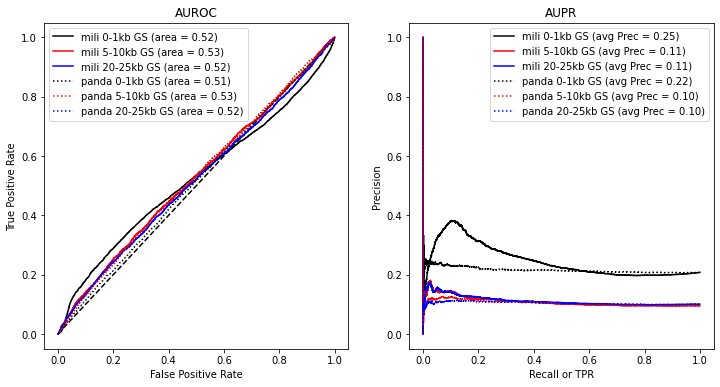

In [ ]:
df_merged['mili_weight']=pd.to_numeric(df_merged['mili_weight'])
df_merged['panda_weight']=pd.to_numeric(df_merged['panda_weight'])
df_merged['GS 0-1kb']=pd.to_numeric(df_merged['GS 0-1kb'])
df_merged['GS 5-10kb']=pd.to_numeric(df_merged['GS 5-10kb'])
df_merged['GS 20-25kb']=pd.to_numeric(df_merged['GS 20-25kb'])
plt.figure(figsize=(12, 6))
# df_merged.weight_y=(compare.weight_y-compare.weight_y.min())/(compare.weight_y.max()-compare.weight_y.min())
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, thresholds = metrics.roc_curve(df_merged['GS 0-1kb'], df_merged.mili_weight)
roc_auc1=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='mili 0-1kb GS (area = {0:0.2f})'''.format(roc_auc1),color='k', linestyle='-', linewidth=1.5)

# plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, thresholds = metrics.roc_curve(df_merged['GS 5-10kb'], df_merged.mili_weight)
roc_auc2=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='mili 5-10kb GS (area = {0:0.2f})'''.format(roc_auc2),color='r', linestyle='-', linewidth=1.5)

# # plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, thresholds = metrics.roc_curve(df_merged['GS 20-25kb'], df_merged.mili_weight)
roc_auc3=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='mili 20-25kb GS (area = {0:0.2f})'''.format(roc_auc3),color='b', linestyle='-', linewidth=1.5)

fpr, tpr, thresholds = metrics.roc_curve(df_merged['GS 0-1kb'], df_merged.panda_weight)
roc_auc4=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='panda 0-1kb GS (area = {0:0.2f})'''.format(roc_auc4),color='k', linestyle=':', linewidth=1.5)

# plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, thresholds = metrics.roc_curve(df_merged['GS 5-10kb'], df_merged.panda_weight)
roc_auc5=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='panda 5-10kb GS (area = {0:0.2f})'''.format(roc_auc5),color='r', linestyle=':', linewidth=1.5)

fpr, tpr, thresholds = metrics.roc_curve(df_merged['GS 20-25kb'], df_merged.mili_weight)
roc_auc6=metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='panda 20-25kb GS (area = {0:0.2f})'''.format(roc_auc6),color='b', linestyle=':', linewidth=1.5)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC')
plt.legend(loc="best")

plt.subplot(1, 2, 2)
# plt.plot([0, 1], [0, 1], 'k--')
precision, recall, thresholds = metrics.precision_recall_curve(df_merged['GS 0-1kb'], df_merged.mili_weight)
roc_auc11=metrics.average_precision_score(df_merged['GS 0-1kb'], df_merged.mili_weight)
plt.plot(recall,precision, label='mili 0-1kb GS (avg Prec = {0:0.2f})'''.format(roc_auc11),color='k', linestyle='-', linewidth=1.5)

precision, recall, thresholds = metrics.precision_recall_curve(df_merged['GS 5-10kb'], df_merged.mili_weight)
roc_auc22=metrics.average_precision_score(df_merged['GS 5-10kb'], df_merged.mili_weight)
plt.plot(recall,precision, label='mili 5-10kb GS (avg Prec = {0:0.2f})'''.format(roc_auc22),color='r', linestyle='-', linewidth=1.5)

precision, recall, thresholds = metrics.precision_recall_curve(df_merged['GS 20-25kb'], df_merged.mili_weight)
roc_auc33=metrics.average_precision_score(df_merged['GS 20-25kb'], df_merged.mili_weight)
plt.plot(recall,precision, label='mili 20-25kb GS (avg Prec = {0:0.2f})'''.format(roc_auc33),color='b', linestyle='-', linewidth=1.5)

precision, recall, thresholds = metrics.precision_recall_curve(df_merged['GS 0-1kb'], df_merged.panda_weight)
roc_auc44=metrics.average_precision_score(df_merged['GS 0-1kb'], df_merged.panda_weight)
plt.plot(recall,precision, label='panda 0-1kb GS (avg Prec = {0:0.2f})'''.format(roc_auc44),color='k', linestyle=':', linewidth=1.5)

precision, recall, thresholds = metrics.precision_recall_curve(df_merged['GS 5-10kb'], df_merged.panda_weight)
roc_auc55=metrics.average_precision_score(df_merged['GS 5-10kb'], df_merged.panda_weight)
plt.plot(recall,precision, label='panda 5-10kb GS (avg Prec = {0:0.2f})'''.format(roc_auc55),color='r', linestyle=':', linewidth=1.5)

precision, recall, thresholds = metrics.precision_recall_curve(df_merged['GS 20-25kb'], df_merged.panda_weight)
roc_auc66=metrics.average_precision_score(df_merged['GS 20-25kb'], df_merged.panda_weight)
plt.plot(recall,precision, label='panda 20-25kb GS (avg Prec = {0:0.2f})'''.format(roc_auc66),color='b', linestyle=':', linewidth=1.5)


plt.xlabel('Recall or TPR')
plt.ylabel('Precision')
plt.title('AUPR')
plt.legend(loc="best")

In [ ]:
df_merged.shape

#### for comparison to just methylation motif -- match to milipeed genes/tf -- can use diagonal expr and ppi or just do by hand

In [ ]:
panda_obj=netZooPy.panda.Panda(expression_file='netZooPy/tests/puma/ToyData/ToyExpressionData.txt', ###matrixes need no patient info
                      # methylation_file='drive/My Drive/Colab Notebooks/A-549c.txt',
                      motif_file='netZooPy/tests/puma/ToyData/ToyMotifData.txt', ###motif need no patient info
                        # motif_file='drive/My Drive/Colab Notebooks/gen_motif.txt', ###motif need no patient info
                      ppi_file='netZooPy/tests/puma/ToyData/ToyPPIData.txt',
    computing='cpu',save_memory=False,save_tmp=True,remove_missing=False,
    keep_expression_matrix=True,modeProcess='intersection',precision='single')


In [ ]:
lioness_obj=netZooPy.lioness.lioness(panda_obj,computing='cpu',precision='single',ncores=2,start=4,end=7)
# lioness_obj.total_lioness_network

In [ ]:
"""A tic-toc analog in Python
Adapted from http://stackoverflow.com/questions/5849800/tic-toc-functions-analog-in-python
"""
import time

class Timer(object):
    def __init__(self, name=None):
        if name:
            print(name)

    def __enter__(self):
        self.tic = time.time()

    def __exit__(self, type, value, traceback):
        print('  Elapsed time: %.2f sec.' % (time.time() - self.tic))

In [ ]:
!python netZooPy/netZooPy/lioness/run_lioness.py -e netZooPy/tests/puma/ToyData/ToyExpressionData.txt -m netZooPy/tests/puma/ToyData/ToyMotifData.txt -p netZooPy/tests/puma/ToyData/ToyPPIData.txt -g cpu -r single -c 4 -o /lioness_output -f npy 1 10

# run largeCOPD lioness

In [3]:
# LCL_ppi=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/ppi/ppi_complete.txt',sep='\t',header=None)
# LCL_ppi.to_csv('drive/My Drive/ppi_complete.txt',sep='\t',index=False,header=False)

# coding_LCL_motif=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/motifs/Hugo_motifCellLine.txt',sep='\t',header=None)
# coding_LCL_motif.to_csv('drive/My Drive/coding_LCL_motif.txt',sep='\t',index=False,header=False)

motif_data='drive/My Drive/coding_LCL_motif.txt'
ppi_data='drive/My Drive/ppi_complete.txt'

In [4]:
# LDcrossLTCOPD=pd.read_csv('drive/My Drive/Colab Notebooks/LARGE_COPD_crossLTCOPD.txt',sep='\t',index_col=0)

LDcrossLTCOPD=pd.read_csv('drive/My Drive/Colab Notebooks/time_group_largeCOPD.txt',sep='\t',index_col=0)
panda_obj1 = Panda(LDcrossLTCOPD, motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,
                     save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
# np.save('drive/My Drive/LARGECOPD/Panda_LargeCrossLTCOPD.npy',panda_obj1.export_panda_results)
# panda_obj1.save_panda_results('drive/My Drive/LARGECOPD/Panda_LargeCrossLTCOPD.npy')

In [ ]:
lioness_obj = Lioness(panda_obj1,computing='gpu',precision='single',save_dir='drive/My Drive/LARGECOPD2/',ncores=1)

pd.DataFrame(lioness_obj.export_lioness_results).to_csv('drive/My Drive/LARGECOPD2/LARGECOPD2.txt')
jj=pd.DataFrame(lioness_obj.export_panda_results,columns=['tf','gene','exp','test'])
jj[['tf','gene']].to_csv('drive/My Drive/LARGECOPD2/LARGECOPD2links.txt')

# !python netZooPy/netZooPy/lioness/run_lioness.py -e drive/My Drive/Colab Notebooks/LARGE_COPD_crossLTCOPD.txt -m coding_LCL_motif.txt -p ppi_complete.txt -g gpu -r single -c 1 -o /LARGElioness_output -f npy 1 10

# run large PANDA

In [56]:
largeCOPD=pd.read_csv('drive/My Drive/Colab Notebooks/LARGE_COPD_crossLTCOPD.txt',sep='\t',index_col=0)

In [57]:
case=largeCOPD.iloc[:,largeCOPD.columns.str.contains('_0_')]
# case.append(largeCOPD.iloc[:,largeCOPD.columns.str.contains('0_1')])
control=largeCOPD.iloc[:,largeCOPD.columns.str.contains('_1_')]
# control.append(largeCOPD.iloc[:,largeCOPD.columns.str.contains('1_1')])

In [58]:
case.columns=case.columns.str.split('_').str[0]
case=case.sort_index(axis=1)
control.columns=control.columns.str.split('_').str[0]
control=control.sort_index(axis=1)
motif_data='drive/My Drive/coding_LCL_motif.txt'
ppi_data='drive/My Drive/ppi_complete.txt'

In [ ]:
traces=pd.unique(case.columns)
for j,trace in enumerate(traces):
  exp=case[trace]
  panda_obj1 = Panda(pd.DataFrame(exp), motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,
                     save_memory = True, remove_missing=False, keep_expression_matrix = False,modeProcess = 'intersection')
  panda_obj1.save_panda_results('drive/My Drive/LARGE_PANDA/case'+trace+'.npy')

In [51]:
case=pd.DataFrame()
traces=glob.glob('drive/MyDrive/LARGE_PANDA/case*.npy')
for j,trace in enumerate(traces):
  tmp=pd.DataFrame(np.load(trace).reshape(8783160)) #636 x 13810 # all TFs by first gene, then second gene
  tmp.columns=[os.path.basename(trace).split('case')[1].split('.npy')[0]]
  case=pd.concat([case,tmp],axis=1)
case.to_csv('drive/MyDrive/LARGE_PANDA/case.txt',sep='\t')


In [52]:
control=pd.DataFrame()
traces=glob.glob('drive/MyDrive/LARGE_PANDA/control*.npy')
for j,trace in enumerate(traces):
  tmp=pd.DataFrame(np.load(trace).reshape(8783160))
  tmp.columns=[os.path.basename(trace).split('control')[1].split('.npy')[0]]
  control=pd.concat([control,tmp],axis=1)
control.to_csv('drive/MyDrive/LARGE_PANDA/control.txt',sep='\t')


In [113]:
control.shape

(15209, 565)

#load Lioness

In [2]:
# panda_obj1.export_panda_results[['tf','gene']].to_csv('drive/My Drive/LARGE_PANDA/LARGECOPD_links.txt',header=False,index=False)
# data=pd.read_csv('drive/My Drive/LARGECOPD2/LARGECOPD2.txt')
# # tdata=pd.read_csv('drive/My Drive/LARGECOPD2/LARGECOPD2_time.txt')
# del data['Unnamed: 0']

links=pd.read_csv('drive/My Drive/LARGE_PANDA/LARGECOPD_links.txt',sep=',',header=None,index_col=None)
case=pd.read_csv('drive/MyDrive/LARGE_PANDA/case.txt',sep='\t',index_col=0)
# control=pd.read_csv('drive/MyDrive/LARGE_PANDA/control.txt',sep='\t')


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
tdata=pd.DataFrame(case.T, index=case.columns)#.interpolate(method='time')
# jj = pd.to_datetime('190'+(data.iloc[:,0:10].columns.astype(str)) + ' ' +'10:00:00 ')
tdata['Datetime']= pd.to_datetime('19'+(case.columns.astype(str)) + ' ' +'10:00:00 ')
# tdata['Datetime']= #jj.append(cc)
tdata = tdata.set_index('Datetime')
# ALL.iloc[1,:].to_list()#.dropna(how='any')
tdata=tdata.interpolate(method='time')
# del data

In [4]:
del case

# build DNN

In [8]:
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from pandas.tseries.offsets import DateOffset
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, LSTM, Conv1D, Bidirectional, Lambda,Dropout

In [9]:

dataset_x = np.array(tdata.T)#np.concatenate((dataset_delta_DJI, dataset_delta_APPL, dataset_delta_AMAZN), axis = 1)

scaler_multi = MinMaxScaler(feature_range=(0, 1))
scaler_multi.fit_transform(dataset_x.reshape(-1, 1))
dataset_x = scaler_multi.transform(dataset_x)

train_size = int(len(dataset_x) * 0.67)
test_size = len(dataset_x) - train_size
train_x, test_x = dataset_x[0:train_size,:], dataset_x[train_size:len(dataset_x),:]

In [10]:

n_input=5
# tdata=tdata[::-1]
add_dates = [tdata.index[-1] + DateOffset(years=x) for x in range(0,n_input+1) ]
future_dates = pd.DataFrame(0,index=add_dates[1:],columns=tdata.columns)

t2data=tdata.append(future_dates)
# tdata=tdata[::-1]
# t2data=t2data[::-1]
t2data=np.array(t2data)

scaler_multi = MinMaxScaler(feature_range=(0, 1)) ## batch normalization between layers
scaler_multi.fit_transform(t2data.reshape(-1, 1))
t2data = scaler_multi.transform(t2data)



In [13]:

train = t2data[::-1]
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
# n_input = 5
lookback=n_input
n_features = t2data.data.shape[1]
generator = TimeseriesGenerator(train,train,sampling_rate=1, length=lookback)#, batch_size=6)


# train_x=train[:-7]
# train_y=train[-7:]
  ### subset

trainA=train[:-6] 
trainA=trainA[:,np.var(trainA,axis=0)>.13]
# trainA=trainA[:,np.var(trainA,axis=0)<.0001]
train_x=trainA[:-6]
train_y=trainA[-6:]

training_sequence = TimeseriesGenerator(train_x, train_x, length=lookback,batch_size=1)
validation_sequence = TimeseriesGenerator(train_y, train_y,  length=lookback,batch_size=1)


In [23]:
training_sequence.data.shape

(48, 244)

In [24]:
model = Sequential()
## graph neural network then (lower D space) to LSTM (neighborhood) NOT conv1d (spatial from images)
initializer=tf.keras.initializers.Orthogonal()
model.add(LSTM(256, input_shape=(lookback, training_sequence.data.shape[1]),return_sequences=True, kernel_initializer=initializer)) #orthoganal initialization for weight, he  # 5 time steps and 32831 features/genes
model.add(Bidirectional(LSTM(128,activation='relu',return_sequences=True))),
model.add((LSTM(128,activation='relu',return_sequences=True))),
model.add((LSTM(64,activation='relu',return_sequences=True))),
model.add((LSTM(48,activation='relu',return_sequences=True))),
model.add((LSTM(32,activation='relu'))),
# model.add(Dropout(0.15))
# model.add((LSTM(32,activation='relu'))),
model.add(Dense(training_sequence.data.shape[1]))
model.compile(loss='mse', optimizer='adam',metrics=['mse','accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 256)            513024    
_________________________________________________________________
bidirectional (Bidirectional (None, 5, 256)            394240    
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 128)            197120    
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 64)             49408     
_________________________________________________________________
lstm_5 (LSTM)                (None, 5, 48)             21696     
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                10368     
_________________________________________________________________
dense (Dense)                (None, 244)              

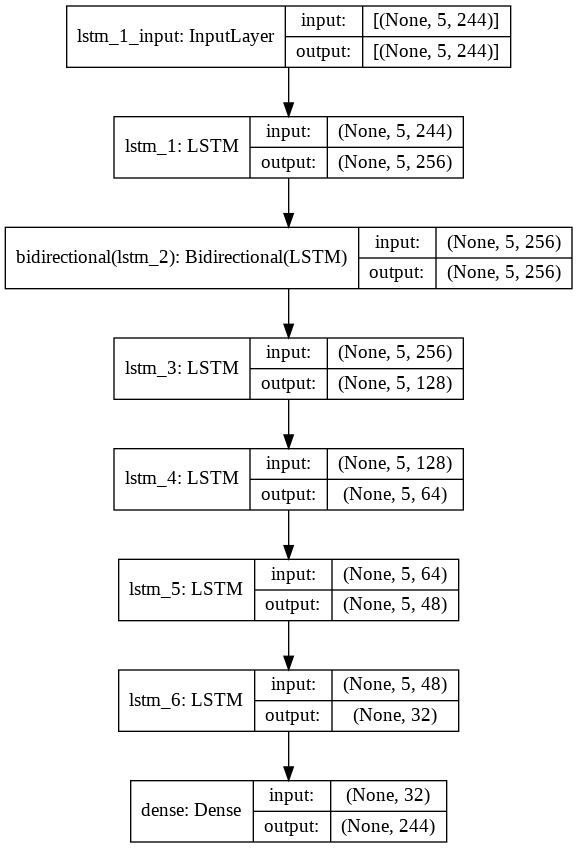

In [25]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image(filename='model.png')

In [26]:
from keras.callbacks import EarlyStopping, LearningRateScheduler,ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch / 20)),
    EarlyStopping(patience=5, verbose=1),#monitor='loss'),
    # ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=False)
]

In [27]:
history =model.fit(training_sequence, epochs=100, callbacks=callbacks,validation_data=validation_sequence)
model.save('drive/MyDrive/largecopd_case_lstm_model.h')

Epoch 1/100
43/43 [==============================] - 18s 102ms/step - loss: 0.3208 - mse: 0.3208 - accuracy: 0.0000e+00 - val_loss: 0.3742 - val_mse: 0.3742 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.37424, saving model to model.h5
Epoch 2/100
43/43 [==============================] - 3s 72ms/step - loss: 0.3229 - mse: 0.3229 - accuracy: 0.0000e+00 - val_loss: 0.3742 - val_mse: 0.3742 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss improved from 0.37424 to 0.37420, saving model to model.h5
Epoch 3/100
43/43 [==============================] - 3s 74ms/step - loss: 0.3248 - mse: 0.3248 - accuracy: 0.0000e+00 - val_loss: 0.3741 - val_mse: 0.3741 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss improved from 0.37420 to 0.37415, saving model to model.h5
Epoch 4/100
43/43 [==============================] - 3s 71ms/step - loss: 0.3210 - mse: 0.3210 - accuracy: 0.0000e+00 - val_loss: 0.3741 - val_mse: 0.3741 - val_accuracy: 0.0000e+00

Epoch 00004: val_loss impro

INFO:tensorflow:Assets written to: drive/MyDrive/largecopd_lstm_model.h/assets


INFO:tensorflow:Assets written to: drive/MyDrive/largecopd_lstm_model.h/assets


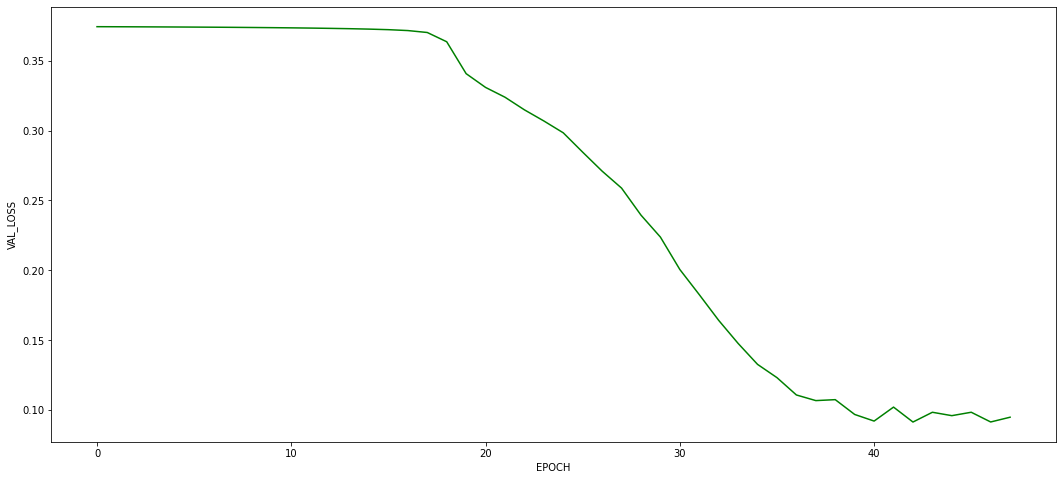

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(hist['epoch'],hist['val_loss'], color= 'green')
# plt.plot(loss, color='red')
# plt.title("Close price of stocks sold")
plt.xlabel("EPOCH")
plt.ylabel("VAL_LOSS")
plt.show()


In [5]:
from keras.models import load_model
model = load_model('drive/MyDrive/largecopd_lstm_model.h')

In [11]:
t2data.shape

(60, 8783160)

In [14]:
# t2data=t2data[::-1]
train = t2data#[:-30]
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
# batch=[]
pred_list = []
# batch = train_y[-n_input:].reshape((1, n_input, t2data.shape[1]))

##subset
train = trainA
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
batch = train_y[-n_input:].reshape((1, n_input, trainA.shape[1]))

# batch=batch.T
for i in range(n_input):
  # print(batch[0,1:,:])
  pred_list.append(model.predict(batch))#[0])  ## comment T then uncomment
  batch = np.append(batch[0,1:,:],pred_list[i],axis=0)
  # print([batch.shape,pred_list[i].T.shape])
  # batch=batch.T
  # print(pred_list[i])
  batch = np.expand_dims(batch, 0)
  # print([i,batch.shape])
print(pd.DataFrame(np.squeeze(pred_list)))

        0         1         2    ...       241       242       243
0  0.351425  0.568207  0.598298  ...  0.445553  0.561477  0.547566
1  0.357817  0.525517  0.550223  ...  0.419519  0.545229  0.512173
2  0.355539  0.524431  0.541806  ...  0.421878  0.556863  0.513379
3  0.355546  0.523671  0.541409  ...  0.421889  0.557950  0.512210
4  0.357679  0.523443  0.545207  ...  0.421177  0.556150  0.510613

[5 rows x 244 columns]


In [18]:
# pred_list=pd.DataFrame(np.reshape(pred_list,[lookback,t2data.shape[1]]))
pred_list=pd.DataFrame(np.reshape(pred_list,[lookback,trainA.shape[1]]))

pred_list=(np.squeeze(pred_list))
pred_list=pd.DataFrame(pred_list)
print(pred_list)

# pred=pd.DataFrame(t2data[::-1])[6:]
pred=pd.DataFrame(trainA)
pred=pred.append(pred_list)
pred=pred.reset_index()
del pred['index']

        0         1         2    ...       241       242       243
0  0.351425  0.568207  0.598298  ...  0.445553  0.561477  0.547566
1  0.357817  0.525517  0.550223  ...  0.419519  0.545229  0.512173
2  0.355539  0.524431  0.541806  ...  0.421878  0.556863  0.513379
3  0.355546  0.523671  0.541409  ...  0.421889  0.557950  0.512210
4  0.357679  0.523443  0.545207  ...  0.421177  0.556150  0.510613

[5 rows x 244 columns]


In [19]:
pred.shape

(59, 244)

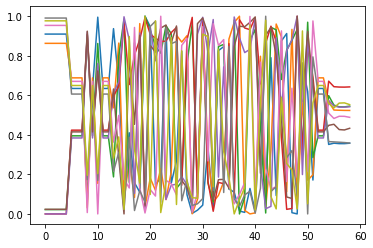

In [21]:
w=plt.plot(pred.iloc[:,0:9])
